In [470]:
import pandas as pd
import numpy as np
from datetime import date, timedelta
from numpy import random
from random import randrange
from random import sample
import warnings
from pandas.core.common import SettingWithCopyWarning
from functools import reduce
import matplotlib.pyplot as plt

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [471]:
symbols = pd.read_csv("Datenanalyse/Data/symbols.csv", parse_dates = True)
optionsdrop = pd.read_csv("Datenanalyse/Data/optionsdrop.csv", parse_dates = True)
symbols = symbols[(symbols["Date"]>= "2018-05-05") & (symbols["Date"]<= "2018-07-05")]


In [472]:
# Convert the string dates to pandas datetime format
optionsdrop['Date'] = pd.to_datetime(optionsdrop.DataDate)
symbols['Date'] = pd.to_datetime(symbols.Date)


# Make datetime values as index
optionsdrop.set_index('Date', inplace=True)
symbols.set_index('Date', inplace=True)

In [473]:
symbols


,Unnamed: 0,Open,High,Low,Close,ADXTR1,ADXPDM1,ADXMDM1,ADXPDI,ADXMDI,...,VSCP,RSI,PPO,TradingPoints,ADXCP,ADX,ADXcrossinglevel,DILevel,PercentProfitOrLoss,UnderlyingSymbol
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-07,1148,18.75,18.87,18.58,18.75,0.29,0.03,0.00,19.792814,18.892209,...,default value,50.885559,0.121793,default value,default value,default value,default value,default value,default value,RF
2018-05-07,1148,164.28,164.34,162.89,163.35,1.45,0.00,0.18,22.895306,15.721670,...,default value,55.446648,-0.025398,default value,default value,default value,default value,default value,default value,NEE
2018-05-07,1148,166.62,168.12,166.06,167.39,2.06,0.72,0.00,19.347376,20.437131,...,default value,58.676294,0.236128,default value,default value,default value,default value,default value,default value,MCO
2018-05-07,1148,53.18,53.94,52.98,53.73,0.96,0.52,0.00,23.502189,23.160010,...,default value,55.407509,0.201668,default value,default value,default value,default value,23.307245615942637,default value,TFC
2018-05-07,1148,104.99,105.17,103.97,104.51,1.20,0.42,0.00,15.686676,19.918627,...,default value,53.645662,0.493288,default value,default value,default value,default value,default value,default value,TXN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-05,1189,50.88,51.17,50.52,50.80,0.69,0.00,0.00,12.430374,23.366911,...,default value,36.776574,-0.232928,default value,default value,default value,default value,default value,default value,TFC
2018-07-05,1189,17.69,17.71,17.42,17.46,0.29,0.00,0.12,16.074379,24.691419,...,default value,31.156293,-0.648170,default value,1,1181,16.07819027988297,default value,default value,RF
2018-07-05,1189,168.69,168.81,167.43,168.54,1.38,0.00,0.19,28.774504,12.998738,...,default value,66.953722,0.403680,default value,default value,default value,default value,default value,default value,NEE


In [474]:
optionsdrop

,Unnamed: 0,UnderlyingSymbol,UnderlyingPrice,Exchange,OptionRoot,OptionExt,Type,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,OpenInterest,T1OpenInterest
Date,,,,,,,,,,,,,,,,
2018-07-26,8,MCO,185.72,*,MCO180817C00105000,NaN,call,2018-08-17,2018-07-26,105.0,45.30,79.30,82.35,0,5,5
2018-07-26,14,MCO,185.72,*,MCO180817C00120000,NaN,call,2018-08-17,2018-07-26,120.0,45.15,63.55,67.90,0,0,0
2018-07-26,24,MCO,185.72,*,MCO180817C00145000,NaN,call,2018-08-17,2018-07-26,145.0,23.86,38.65,42.50,0,1,1
2018-07-26,26,MCO,185.72,*,MCO180817C00150000,NaN,call,2018-08-17,2018-07-26,150.0,37.50,34.85,37.55,0,22,22
2018-07-26,28,MCO,185.72,*,MCO180817C00155000,NaN,call,2018-08-17,2018-07-26,155.0,28.00,29.90,32.65,0,36,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-17,96546,TXN,115.80,*,TXN200117C00150000,NaN,call,2020-01-17,2018-07-17,150.0,3.85,3.60,3.95,0,103,103
2018-07-17,96550,TXN,115.80,*,TXN200117C00160000,NaN,call,2020-01-17,2018-07-17,160.0,2.14,2.33,2.62,0,62,62
2018-07-17,96552,TXN,115.80,*,TXN200117C00165000,NaN,call,2020-01-17,2018-07-17,165.0,1.81,1.88,2.14,0,17,17


In [485]:
def plotCloseAll():
    df2 = symbols
    # Create an axes object
    axes = plt.gca()

    # pass the axes object to plot function
    df2[df2['UnderlyingSymbol']=='NEE'].plot(kind='line',y='Close', ax=axes, label= "NEE", figsize=(30,10))
    df2[df2['UnderlyingSymbol']=='MCO'].plot(kind='line',y='Close', ax=axes, label= "MCO")
    df2[df2['UnderlyingSymbol']=='TFC'].plot(kind='line',y='Close', ax=axes, label= "TFC")
    df2[df2['UnderlyingSymbol']=='RF'].plot(kind='line',y='Close', ax=axes, label= "RF")
    df2[df2['UnderlyingSymbol']=='TXN'].plot(kind='line',y='Close', ax=axes, label= "TXN")

    plt.title("Date/Close All")
    plt.xlabel("Date")
    plt.ylabel("Close")

In [499]:
def plotCloseAllMarkers():
    df2 = symbols
    # Create an axes object
    axes = plt.gca()

    minC = df2["Close"].min(axis = 0)

    df3 = df2[df2['TradingPoints'] != 'default value']
    df3['TradingPoints'].astype(int)
    df3.loc[:,'Close'] = minC

    tp0 = df3[(df3['TradingPoints'] == "0") | (df3['TradingPoints'] == "2")]
    tp1 = df3[(df3['TradingPoints'] == "1") | (df3['TradingPoints'] == "3")]
    tp2 = df3[(df3['TradingPoints'] == "4") | (df3['TradingPoints'] == "5")]

    # pass the axes object to plot function
    df2[df2['UnderlyingSymbol']=='NEE'].plot(kind='line',y='Close', ax=axes, label= "NEE", figsize=(30,10), zorder=1)
    df2[df2['UnderlyingSymbol']=='MCO'].plot(kind='line',y='Close', ax=axes, label= "MCO", zorder=1)
    df2[df2['UnderlyingSymbol']=='TFC'].plot(kind='line',y='Close', ax=axes, label= "TFC", zorder=1)
    df2[df2['UnderlyingSymbol']=='RF'].plot(kind='line',y='Close', ax=axes, label= "RF", zorder=1)
    df2[df2['UnderlyingSymbol']=='TXN'].plot(kind='line',y='Close', ax=axes, label= "TXN", zorder=1)

    plt.scatter(tp0.index, tp0['Close'], color='g', marker="^", s=500, zorder=2)
    plt.scatter(tp1.index, tp1['Close'], color='r', marker="v", s=500, zorder=2)
    plt.scatter(tp2.index, tp2['Close'], color='0.0', marker="x", s=500, zorder=2)

    plt.title("Date/Close All Markers")
    plt.xlabel("Date")
    plt.ylabel("Close")

In [501]:
def plotClose(sym):
    df2 = symbols

    # Create an axes object
    axes = plt.gca()

    #Filter Symbol
    df2 = df2[df2['UnderlyingSymbol']==sym]

    minC = df2["Close"].min(axis = 0)

    df3 = df2[df2['TradingPoints'] != 'default value']
    df3['TradingPoints'].astype(int)
    df3.loc[:,'Close'] = minC

    tp0 = df3[(df3['TradingPoints'] == "0") | (df3['TradingPoints'] == "2")]
    tp1 = df3[(df3['TradingPoints'] == "1") | (df3['TradingPoints'] == "3")]
    tp2 = df3[(df3['TradingPoints'] == "4") | (df3['TradingPoints'] == "5")]

    # pass the axes object to plot function
    df2.plot(kind='line',y='Close', ax=axes, figsize=(30,10), label= sym, zorder=1)
    plt.scatter(tp0.index, tp0['Close'], color='g', marker="^", s=500, zorder=2)
    plt.scatter(tp1.index, tp1['Close'], color='r', marker="v", s=500, zorder=2)
    plt.scatter(tp2.index, tp2['Close'], color='0.0', marker="x", s=500, zorder=2)

    plt.title("Date/Close "+sym)
    plt.xlabel("Date")

In [488]:
def plotMoneyness(sym):
    df2 = optionsdrop

    # Create an axes object
    axes = plt.gca()

    #Filter Symbol
    df2 = df2[df2['UnderlyingSymbol']==sym]
    df2["moneyness"] = df2["UnderlyingPrice"] - df2["Strike"]

    # pass the axes object to plot function

    df2.plot(kind='line',y='moneyness', ax=axes, figsize=(30,10), label= sym)

    plt.title("Moneyness "+sym)
    plt.xlabel("Date")
    plt.ylabel("Moneyness")


In [489]:
def plotMoneynessAll():
    df2 = optionsdrop
    # Create an axes object
    axes = plt.gca()

    df2["moneyness"] = df2["UnderlyingPrice"] - df2["Strike"]

    # pass the axes object to plot function
    df2[df2['UnderlyingSymbol']=='NEE'].plot(kind='line',y='moneyness', ax=axes, figsize=(30,10), label= "NEE")
    df2[df2['UnderlyingSymbol']=='MCO'].plot(kind='line',y='moneyness', ax=axes, label= "MCO")
    df2[df2['UnderlyingSymbol']=='TFC'].plot(kind='line',y='moneyness', ax=axes, label= "TFC")
    df2[df2['UnderlyingSymbol']=='RF'].plot(kind='line',y='moneyness', ax=axes, label= "RF")
    df2[df2['UnderlyingSymbol']=='TXN'].plot(kind='line',y='moneyness', ax=axes, label= "TXN")

    plt.title("Moneyness All")
    plt.xlabel("Date")
    plt.ylabel("Moneyness")

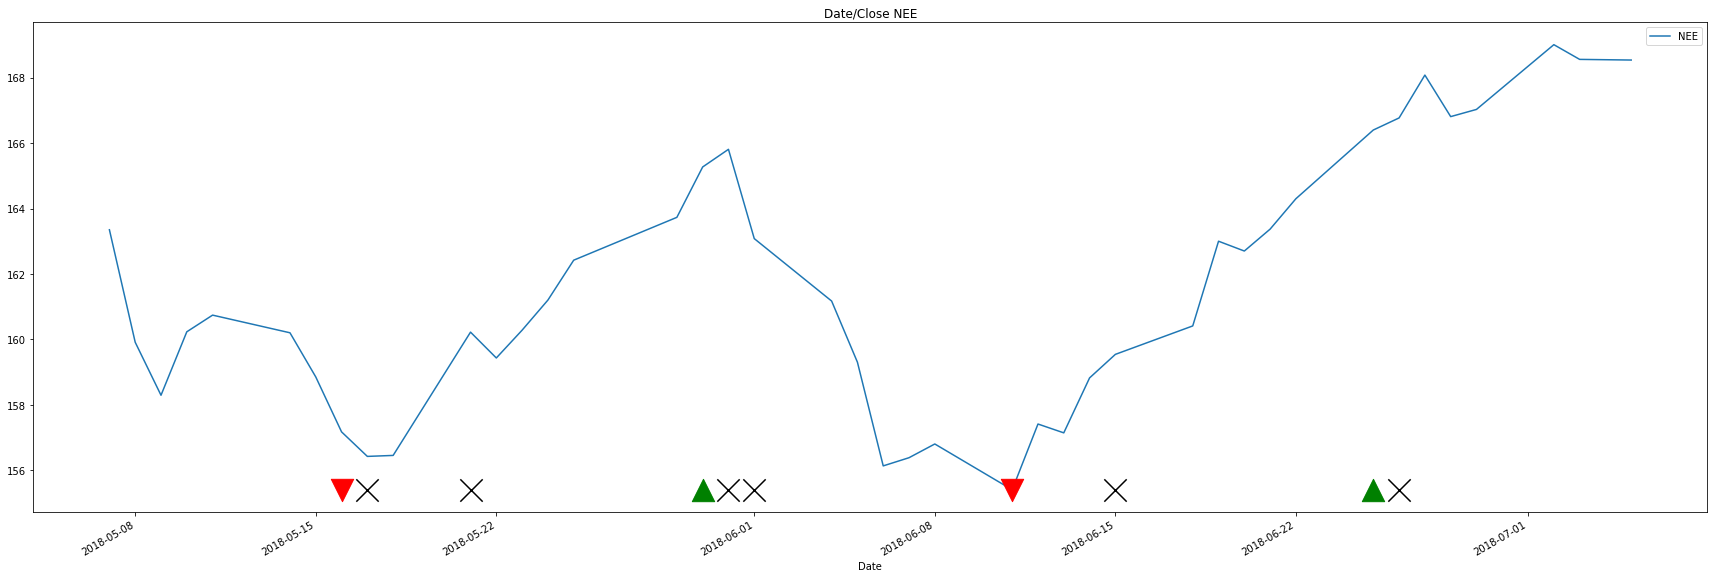

In [504]:
plotClose("NEE")

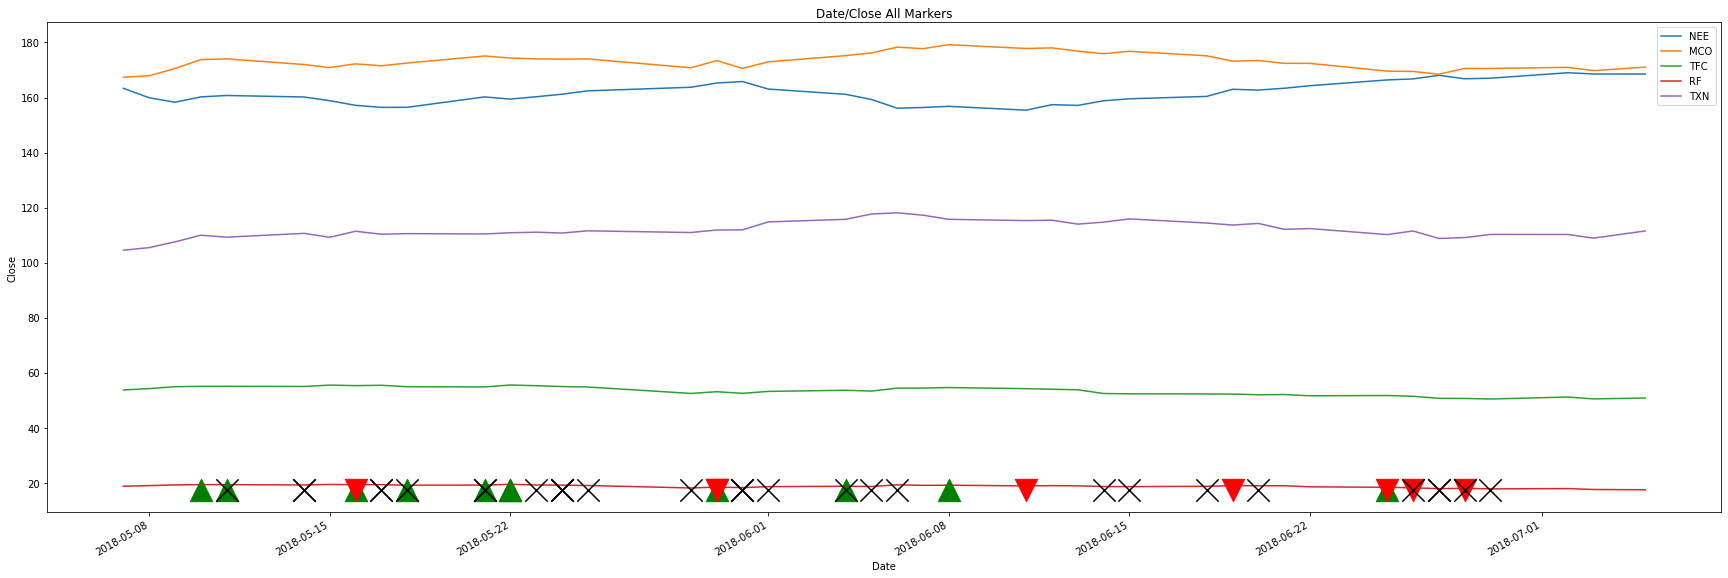

In [500]:
plotCloseAllMarkers()

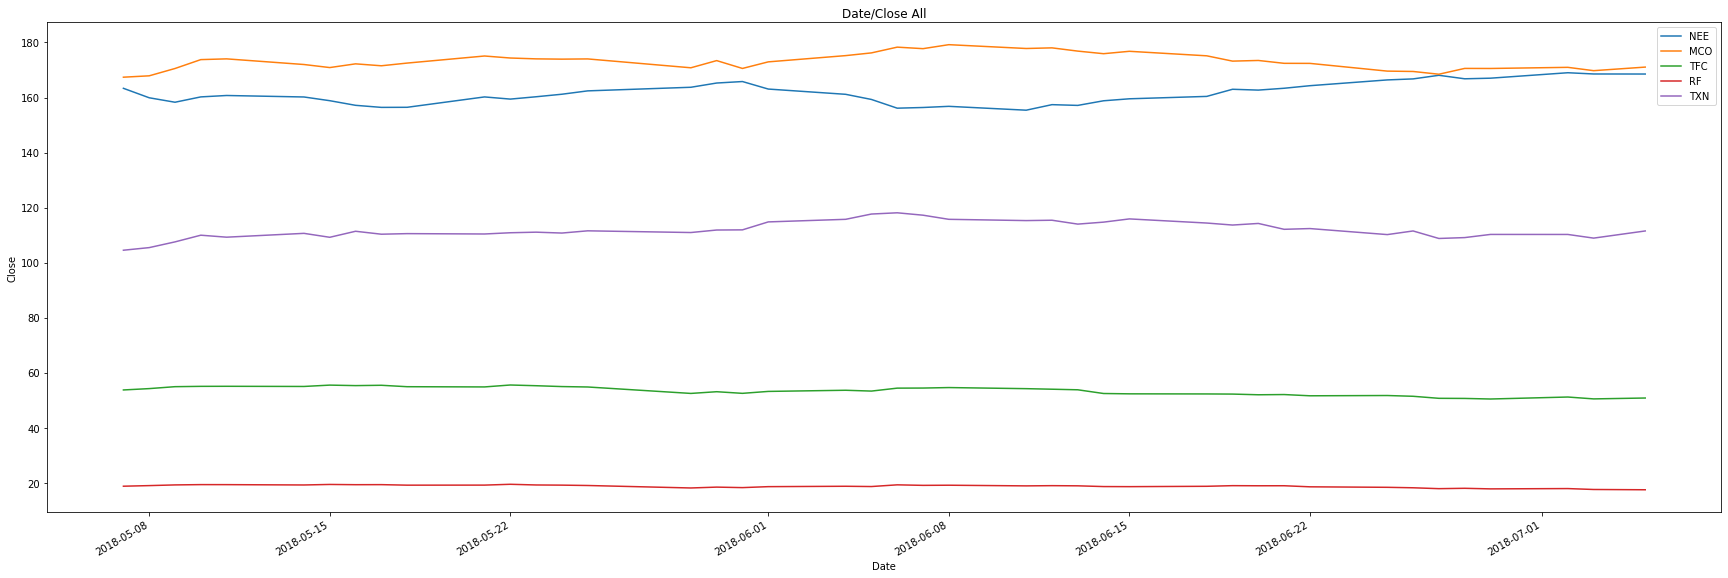

In [492]:
plotCloseAll()

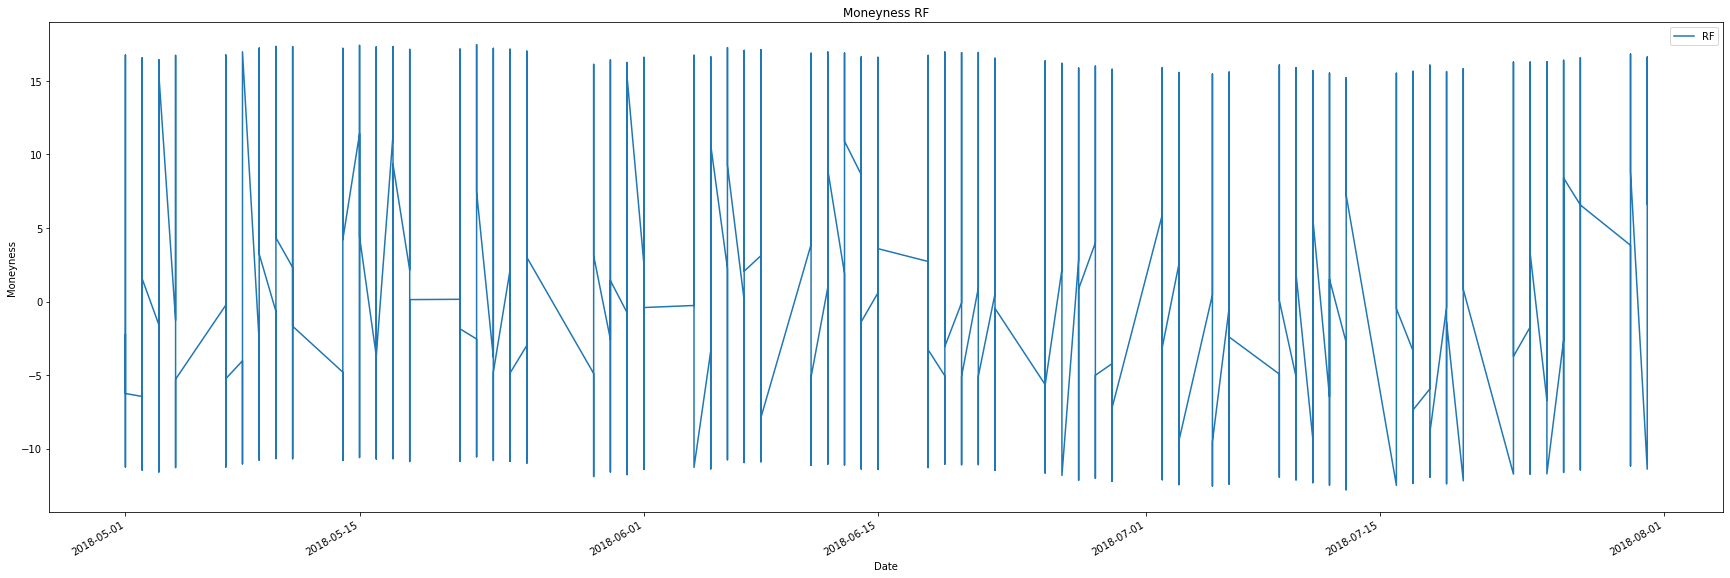

In [493]:
plotMoneyness("RF")

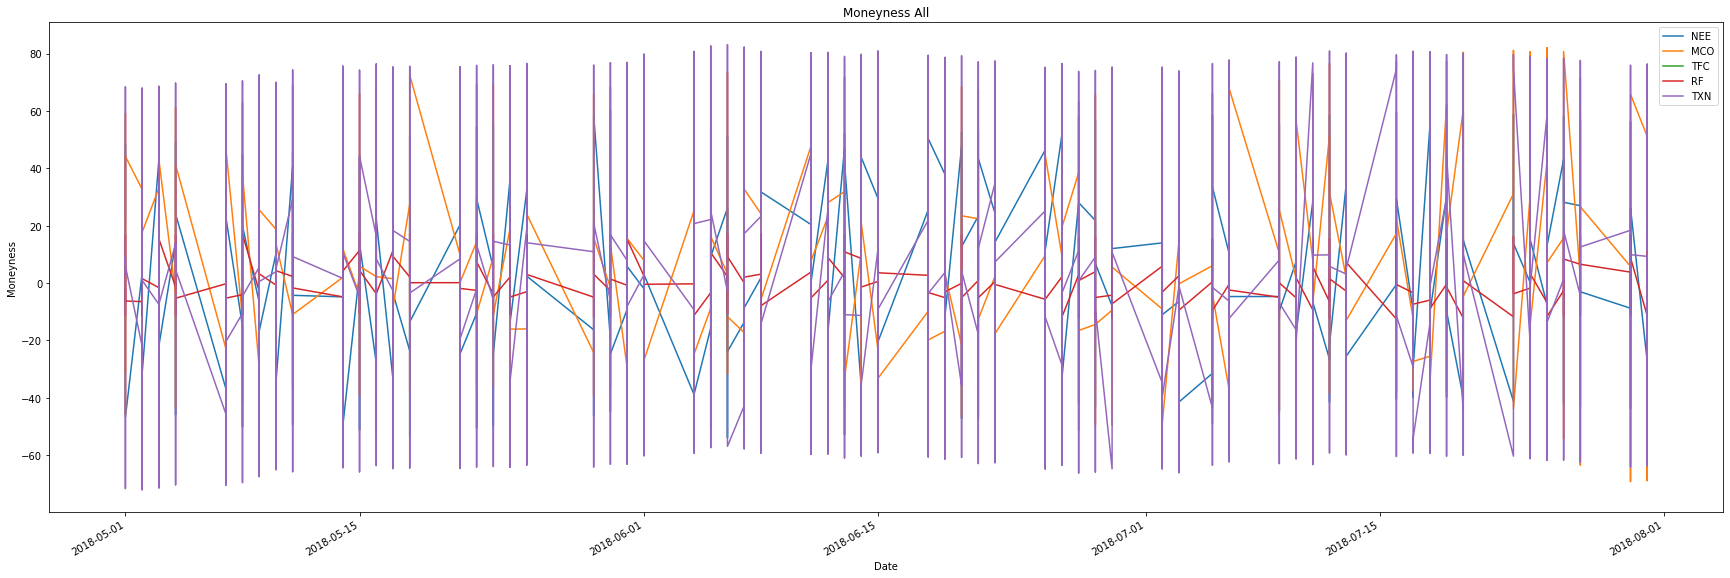

In [494]:
plotMoneynessAll()